In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
from datetime import datetime
from datetime import timedelta

from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam

Using TensorFlow backend.
C:\Users\Siddharth\Anaconda3\envs\tensorflowenvv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Siddharth\Anaconda3\envs\tensorflowenvv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Siddharth\Anaconda3\envs\tensorflowenvv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [13]:
import plotly.express as px

In [14]:
summarized =pd.read_csv(r"C:\Users\Siddharth\Desktop\certificates\internshiptask\New folder (2)\COVID-19_Cases_Summarized_by_Age_Group.csv")
summarized.head(1200)

,Specimen Collection Date,Age Group,New Confirmed Cases,Cumulative Confirmed Cases,Last Updated at
0,2020/03/12,51-60,2,6,08/09/2020 03:15:02 PM
1,2020/03/13,51-60,2,8,08/09/2020 03:15:02 PM
2,2020/03/14,51-60,1,9,08/09/2020 03:15:02 PM
3,2020/03/15,51-60,0,9,08/09/2020 03:15:02 PM
4,2020/03/16,51-60,8,17,08/09/2020 03:15:02 PM
...,...,...,...,...,...
1172,2020/08/04,61-70,7,525,08/09/2020 03:15:02 PM
1173,2020/08/05,61-70,5,530,08/09/2020 03:15:02 PM
1174,2020/08/06,61-70,1,531,08/09/2020 03:15:02 PM
1175,2020/08/07,61-70,2,533,08/09/2020 03:15:02 PM


In [15]:
deathcount=pd.read_csv(r"C:\Users\Siddharth\Desktop\certificates\internshiptask\New folder (2)\Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")
deathcount.head(2)

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,08/05/2020,02/01/2020,08/01/2020,United States,All,Under 1 year,15.0,8832.0,82.0,2.0,14.0,109.0,NaN
1,08/05/2020,02/01/2020,08/01/2020,United States,All,1-4 years,10.0,1690.0,55.0,2.0,41.0,104.0,NaN


In [19]:
0todays_date = '2020-08-16' 

In [65]:
summarized= summarized.sort_values('Age Group',ascending=True)[0:]
summarized.groupby(summarized["Age Group"]).sum()
summarized

,Specimen Collection Date,Age Group,New Confirmed Cases,Cumulative Confirmed Cases,Last Updated at
588,2020/07/25,18-30,22,1587,08/09/2020 03:15:02 PM
457,2020/03/16,18-30,2,19,08/09/2020 03:15:02 PM
460,2020/03/19,18-30,3,32,08/09/2020 03:15:02 PM
465,2020/03/24,18-30,8,63,08/09/2020 03:15:02 PM
470,2020/03/29,18-30,2,85,08/09/2020 03:15:02 PM
...,...,...,...,...,...
829,2020/06/25,under 18,4,298,08/09/2020 03:15:02 PM
781,2020/05/08,under 18,6,87,08/09/2020 03:15:02 PM
780,2020/05/07,under 18,4,81,08/09/2020 03:15:02 PM
870,2020/08/05,under 18,12,774,08/09/2020 03:15:02 PM


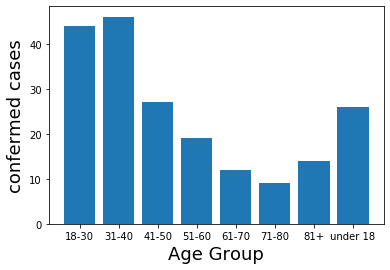

In [67]:

#age = ['18-30','31-40','41-50','51-60','61-70','71-80','81+','under 18']
plt.bar(summarized["Age Group"],
        summarized["New Confirmed Cases"])

plt.xlabel("Age Group",fontsize=18)
plt.ylabel("confermed cases",fontsize=18)
plt.savefig("conferend bar.png")
plt.show()

In [46]:
fig = px.bar(summarized.sort_values('Age Group',ascending=True)[0:], 
             x="Age Group", 
             y="Cumulative Confirmed Cases",
             
             barmode='group',
             title='COVID-19 Infections in SF as of '+todays_date)


fig.show()

In [47]:
fig = px.bar(summarized.sort_values('Age Group',ascending=True)[0:], 
             x="Age Group", 
             y="New Confirmed Cases",
             
             barmode='group',
             title='COVID-19 Infections in SF as of '+todays_date)

fig.show()